In [1]:
import numpy as np
import matplotlib.pyplot as plt
from kitti_util import *
from pylab import *
from plot_util import *
# ==============================================================================
#参考网址：https://www.dandelioncloud.cn/article/details/1507186117932830722
# ==============================================================================

执行

1
热力图尺寸： (900, 600, 5)


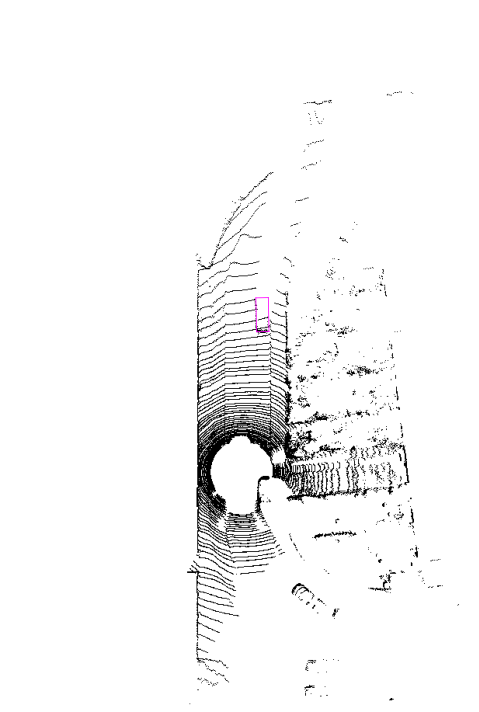

In [2]:
img_id = 2500
#数据集路径
kitti_path="/home/huangjiangeng/OpenPCDet/data/kitti/training"

calib = Calibration(kitti_path+"/calib/%06d.txt"%img_id) ## Path ## need to be changed
path_points =kitti_path+"/velodyne/%06d.bin"%img_id   #点云
points = np.fromfile(path_points, dtype=np.float32).reshape(-1, 4)
df = read_detection(kitti_path+"/label_2/%06d.txt"%img_id)  #读取标签，可以选择过滤car
# print(df.head(5))#查看前5个标签
print(len(df))

fig, ax = plt.subplots(figsize=(10, 10))

side_const=(-30, 30-0.05)#左右显示的范围，(-30, 30-0.05)为完整范围。
fwd_const=(-30, 60-0.05)#前后显示的范围，(-30, 60-0.05)为完整范围。
height_const=(-2, 2)#上下显示的范围,(-2, 2)为完整范围。
box_color="fuchsia"   #box色彩
box_linewidth=0.8  #box线宽


res_const=0.1 #res决定着点云的分辨率，越小分辨率越高
zres_const=1.0 #z方向的切片长度，决定在z方向的通道数。
top = point_cloud_2_top(points, res=res_const,zres=zres_const, side_range=side_const, fwd_range=fwd_const,height_range=height_const)
top = np.array(top, dtype = np.float32)
print("热力图尺寸：",top.shape)#在z方向有多少通道取决于切片长度zres

point_slices=top[:,:,0]#选择要显示的切片，0是下标，一般0即可，可以多尝试几个
#将切片二值化，大于np.min(point_slices)的为1，小于的为0，目的是让图像更清晰。
point_slices=np.where(point_slices>np.min(point_slices),1,0)
# ax.imshow(point_slices,aspect='equal')#
ax.imshow(point_slices, cmap=plt.cm.binary,aspect='equal') # binary为黑白色，加_r取反为白黑色，渐变色

#绘制框图
draw_2Dbox(df_=df ,calib_=calib,ax_=ax ,res_const_=res_const ,side_const_=side_const ,
            fwd_const_=fwd_const ,box_linewidth_=box_linewidth ,box_color_=box_color)

plt.axis('off')
plt.tight_layout()#自动调整子图参数,使之填充整个图像区域
# plt.savefig("../res_image/point_show.png")#保存
plt.show()